In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pickle
import torch
import sys
sys.path.append("/home/vblasone/climate-DL/predictions")
from utils_predictions import create_zones, plot_italy

In [2]:
with open("/home/vblasone/HiResPrecipNet/predictions/G_predictions_north_9_neighbours.pkl", 'rb') as f:
    G_predictions = pickle.load(f)

In [3]:
mask = np.array([~torch.isnan(G_predictions.pr_gripho[i,:]).all().numpy() for i in range(G_predictions.pr.shape[0])])
# pr_mask = G_predictions.pr_gripho.numpy()[mask,:] >= 0.1

In [8]:
pr_gripho = G_predictions.pr_gripho #* pr_mask
pr_pred = G_predictions.pr_reg #.pr_reg
# pr_pred[pr_mask==0] = 0

In [9]:
pos = torch.concatenate((G_predictions['high'].lon.unsqueeze(-1), G_predictions['high'].lat.unsqueeze(-1)), dim=-1)

pos.shape

torch.Size([14036, 2])

In [10]:
zones = create_zones(zones_file="/home/vblasone/climate-DL/preprocessing/Italia.txt")

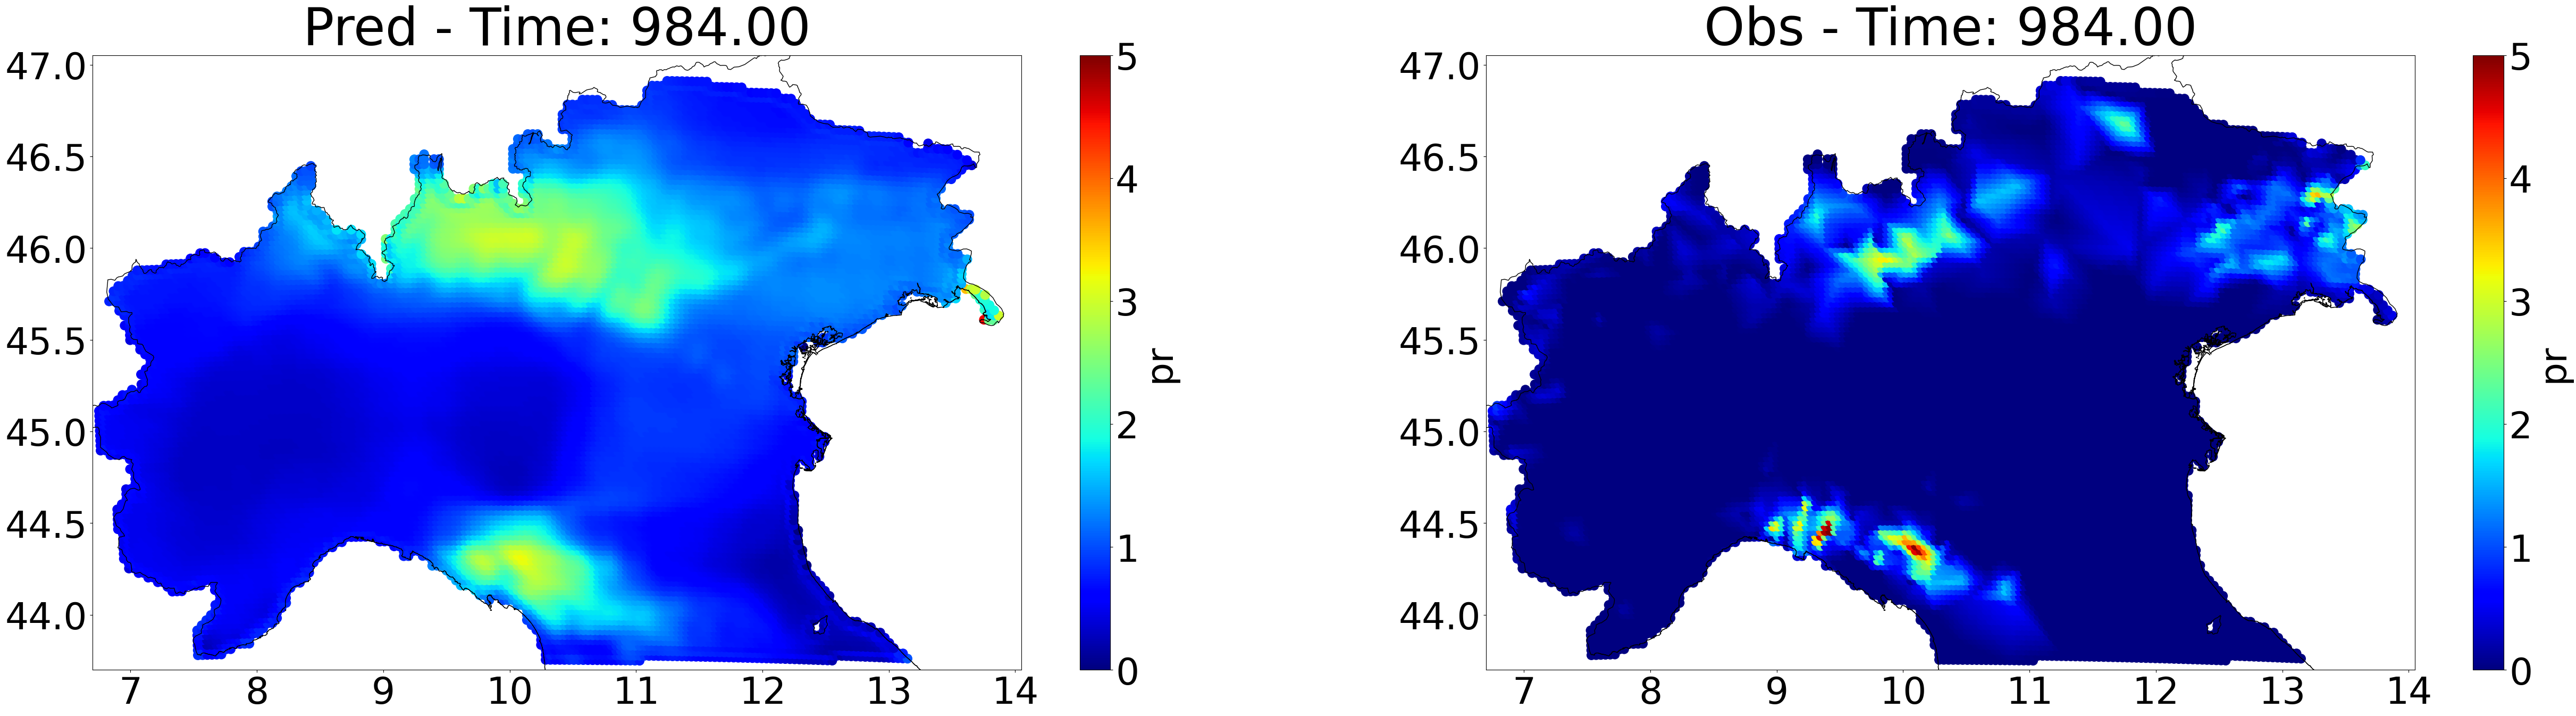

In [11]:
# Parameters
first_t = 31*24+1
last_t = first_t + 24*10
time = range(first_t, last_t)
num_frames = len(time)

x_size = 31
y_size = 15
pr_min=0
pr_max=5
font_size=50
xlim = [6.70, 14.05]
ylim = [43.7, 47.05]

plt.rcParams.update({'font.size': int(font_size)})

# Create a scatter plot for the initial frame
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(x_size*2,y_size))

sc1 = ax1.scatter(pos[:,0], pos[:,1], c=pr_pred[mask,first_t], cmap='jet', s=150,
    vmin=pr_min, vmax=pr_max)
plot_italy(zones, color='black', ax=ax1, alpha_fill=0)
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('pr')
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

# Scatter plot for the initial frame in subplot 2
sc2 = ax2.scatter(pos[:,0], pos[:,1], c=pr_gripho[mask,first_t], cmap='jet', s=150,
    vmin=pr_min, vmax=pr_max)
plot_italy(zones, color='black', ax=ax2, alpha_fill=0)
cbar2 = plt.colorbar(sc2, ax=ax2)
cbar2.set_label('pr')
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)


# Update function for the animation
def update(frame):
    sc1.set_array(pr_pred[mask,first_t+frame])
    sc2.set_array(pr_gripho[mask,first_t+frame])
    ax1.set_title(f'Pred - Time: {time[frame]:.2f}', fontsize=70)
    ax2.set_title(f'Obs - Time: {time[frame]:.2f}', fontsize=70)
    return sc1, sc2

# Create the animation
animation = FuncAnimation(fig, update, frames=num_frames, interval=200)

# Save the animation as a video (choose the desired format)
animation.save('spatio_temporal_9knn.mp4', writer='ffmpeg', fps=4)

# Show the plot (optional)
plt.show()